# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import os
import warnings

from google.colab import files
import io

# Konfigurasi
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

print("Library berhasil diimpor.")

Library berhasil diimpor.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
print("Silakan upload file dataset (CSV)...")
uploaded = files.upload()

# Ambil nama file yang diupload
filename = list(uploaded.keys())[0]
print(f"File '{filename}' berhasil diupload")

# Membaca dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";")

print("Dataset berhasil dimuat")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

df.head()

Silakan upload file dataset (CSV)...


Saving bank-full.csv to bank-full.csv
File 'bank-full.csv' berhasil diupload
Dataset berhasil dimuat
Jumlah baris: 45211
Jumlah kolom: 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Informasi dataset
print("Info dataset")
df.info()

# Statistik deskriptif
print("\nStatistik deskriptif")
df.describe()

Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Statistik deskriptif


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Cek missing value
print("Missing value per kolom")
df.isnull().sum()

Missing value per kolom


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


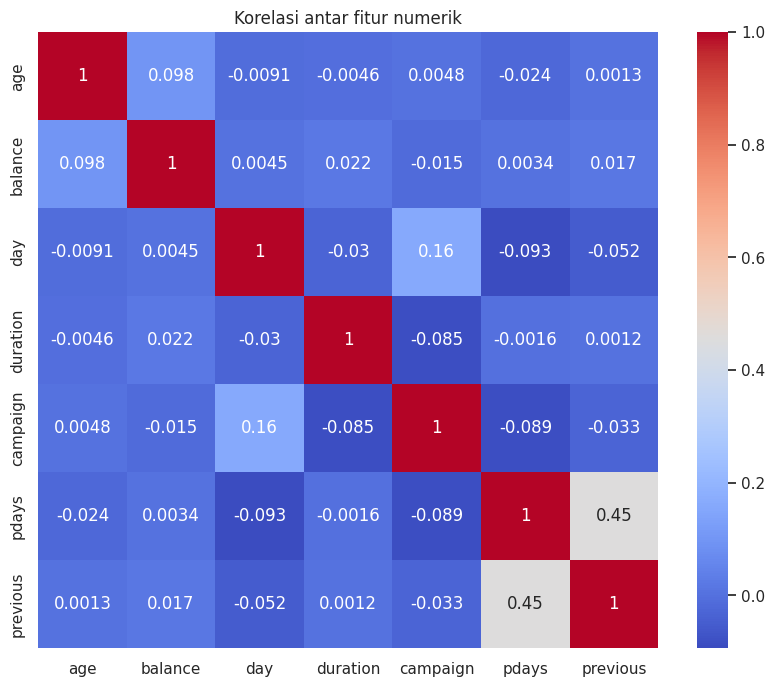

In [5]:
# Korelasi fitur numerik
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()

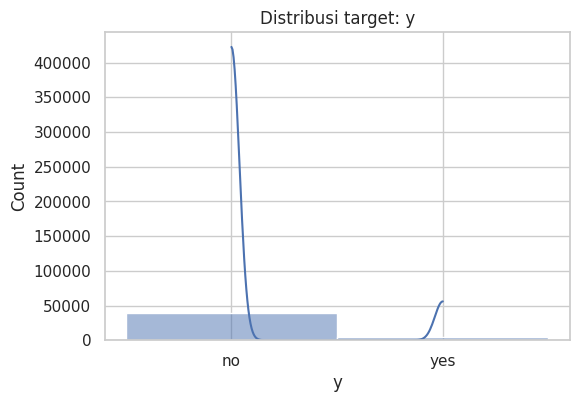

In [6]:
# Distribusi target
target_col = df.columns[-1]

plt.figure(figsize=(6, 4))
sns.histplot(df[target_col], kde=True)
plt.title(f"Distribusi target: {target_col}")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# Target
TARGET_COLUMN = "y"
print(f"Target: {TARGET_COLUMN}")

# Menangani missing value
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# Encoding data kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

# Menghapus data duplikat
df = df.drop_duplicates()

# Memisahkan fitur dan target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Preprocessing selesai")
X_train_final.head()

Target: y
Preprocessing selesai


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.006515,-1.020575,-0.276680,-1.636573,-0.138113,-0.169381,0.892343,-0.438594,1.517492,-0.098218,0.824500,-0.719756,-0.565886,-0.411364,-0.244772,0.445114
1,0.759937,1.423250,-0.276680,-1.636573,-0.138113,0.017848,0.892343,-0.438594,-0.711462,1.703422,-0.174289,0.047138,-0.245389,-0.411364,-0.244772,0.445114
2,0.100693,-1.326053,-0.276680,-0.297306,-0.138113,0.820681,-1.120646,-0.438594,-0.711462,1.823532,-0.174289,-0.493970,0.395606,-0.411364,-0.244772,0.445114
3,-0.370196,-0.104140,1.369745,1.041961,-0.138113,-0.489588,0.892343,-0.438594,1.517492,-0.578656,0.158640,0.459781,2.639088,-0.411364,-0.244772,0.445114
4,1.419181,-1.020575,-0.276680,-1.636573,-0.138113,0.706889,-1.120646,-0.438594,-0.711462,-0.098218,-1.838937,0.027674,-0.245389,-0.411364,-0.244772,0.445114


In [8]:
processed_df = pd.concat(
    [X_train_final, y_train.reset_index(drop=True)],
    axis=1
)

processed_df.to_csv("UCI Bank Marketing dataset_preprocessing.csv", index=False)